# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict Selling_Price using an appropriate predictor variable.


# Step 1: Reading and Understanding the Data

Let's start with the following steps:

    1 Importing data using the pandas library
    2 Understanding the structure of the data

In [19]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [57]:
import numpy as np
import pandas as pd

In [20]:
p=pd.read_csv("car data.csv")

In [21]:
p.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
p.shape

(301, 9)

In [23]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
p.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Step 2: Visualising the Data
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Selling Price.

In [58]:
import matplotlib.pyplot as plt 
import seaborn as sns

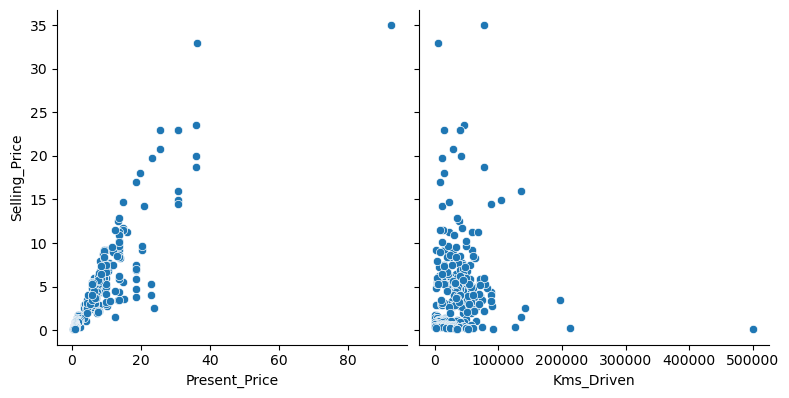

In [59]:
sns.pairplot(p, x_vars=['Present_Price', 'Kms_Driven'], y_vars='Selling_Price',size=4, aspect=1, kind='scatter')
plt.show()

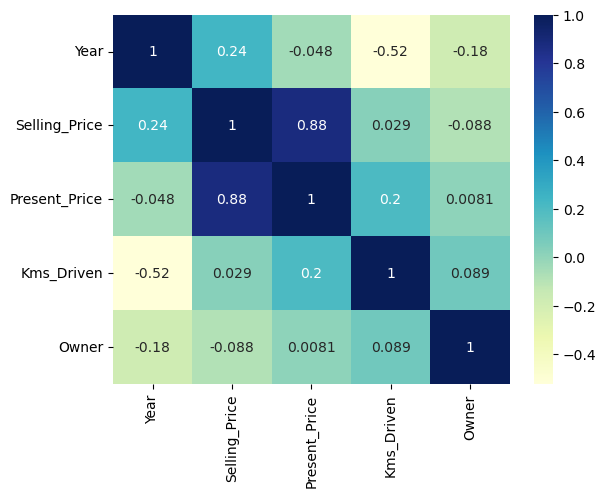

In [35]:
sns.heatmap(p.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable Present_price seems to be most correlated with Selling_price. So let us go ahead and perform simple linear regression using Present_price as our feature variable.

# Step 3: Performing Simple Linear Regression
Equation of linear regression:
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛

In our case:

𝑦=𝑐+𝑚1×Present_Price

The 𝑚 values are called the model coefficients or model parameters.


# Generic Steps in model building using statsmodels

We first assign the feature variable, Present_Price, in this case, to the variable X and the response variable, Selling_Price, to the variable y.


In [63]:
X = p['Present_Price']
y = p['Selling_Price']

# Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
X_train.head()

156     0.52
98     18.61
276    13.60
203     4.60
123     1.47
Name: Present_Price, dtype: float64

In [40]:
y_train.head()

156    0.48
98     7.05
276    8.65
203    2.95
123    1.00
Name: Selling_Price, dtype: float64

# Building a Linear Model

You first need to import the statsmodel.api library using which you'll perform the linear regression.


In [41]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [42]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [66]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const            0.849028
Present_Price    0.481649
dtype: float64

In [67]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     755.9
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.42e-71
Time:                        11:35:03   Log-Likelihood:                -477.43
No. Observations:                 210   AIC:                             958.9
Df Residuals:                     208   BIC:                             965.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8490      0.213      3.982

# Looking at some key statistics from the summary

The values we are concerned with are -

    The coefficients and significance (p-values)
    R-squared
    F statistic and its significance



 # 1. The coefficient for Present_Price is 0.048, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance

# 2. R - squared is 0.784

Meaning that 78.4% of the variance in Selling_Price is explained by Present_Price

This is a decent R-squared value.


# 3.F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

𝑆elling_Price=0.8490+0.4816×Present_Price

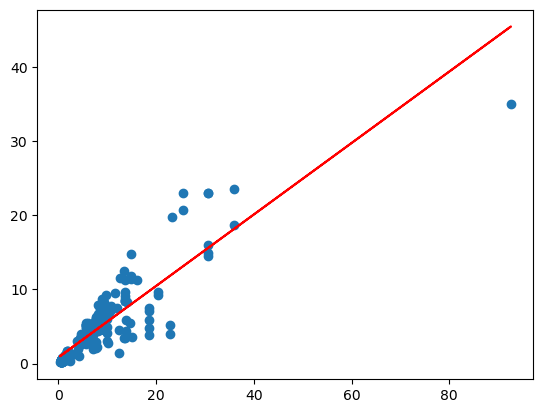

In [72]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.8490 + 0.4816*X_train, 'r')
plt.show()

# Step 4: Residual analysis

To validate assumptions of the model, and hence the reliability for inference


# Assumptions of Simple Linear Regression

1]Linearity: The relationship between X and the mean of Y is linear.



2]Homoscedasticity: The variance of residual is the same for any value of X.



3]Independence: Observations are independent of each other.

4]Normality: For any fixed value of X, Y is normally distributed.

# Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [73]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

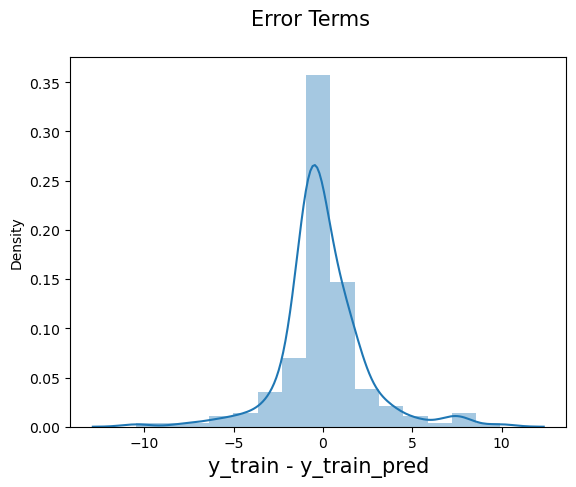

In [70]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

# Looking for patterns in the residuals

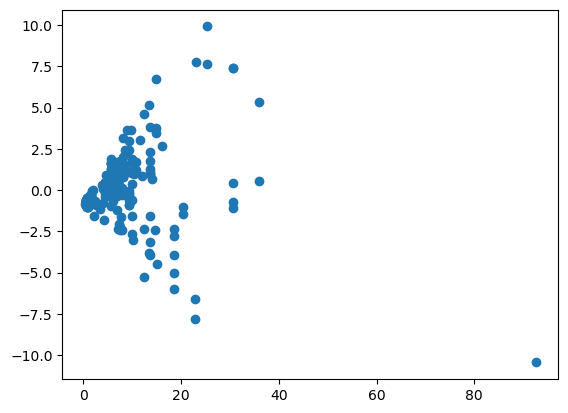

In [49]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data


It follows all the assumptions correctly

# Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.


In [50]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [51]:
y_pred.head()

199    1.128384
201    4.119425
111    1.571502
125    1.691914
46     3.204292
dtype: float64

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Looking at the RMSE

In [53]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.643375821633826

# Checking the R-squared on the test set

In [54]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7321667245816791

# Visualizing the fit on the test set

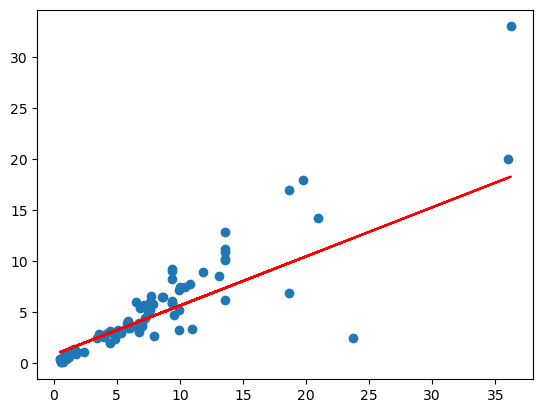

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 0.8490 + 0.4816 * X_test, 'r')
plt.show()